In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
msft = pd.read_csv(filepath_or_buffer="/Users/g01289358/Downloads/MSFT.csv", parse_dates=True)

In [14]:
msft.set_index("Date", inplace=True)

In [80]:
msft.index = pd.to_datetime(msft.index, infer_datetime_format=True)
msft_adjclose = msft['Adj Close']

In [115]:
msft_adj_sample = msft_adjclose["2006-12-31":] 

In [83]:
msft_adj_sample.head()

Date
2010-12-31    22.425476
2011-01-03    22.481720
2011-01-04    22.570108
2011-01-05    22.497786
2011-01-06    23.156651
Name: Adj Close, dtype: float64

In [116]:
data = pd.DataFrame(msft_adj_sample, columns=['Adj Close'])

In [117]:
data['adj_log_return'] = data['Adj Close'].pct_change()

In [734]:
arma11garch11 = pd.read_csv(filepath_or_buffer="/Users/g01289358/Downloads/Models/arma11garch11Fitted.csv",
                           parse_dates=True)

In [735]:
arma11garch11.index = pd.to_datetime(arma11garch11['Unnamed: 0'])

In [736]:
arma11garch11.index.name = "Date"

In [737]:
arma11garch11.columns

Index(['Unnamed: 0', 'x'], dtype='object')

In [738]:
arma11garch11.drop(columns=['Unnamed: 0'], axis=1, inplace=True)

In [739]:
arma11garch11.rename({'x': 'arma11garch11'}, axis=1, inplace=True)

In [124]:
data_0 = pd.concat([data, arma11garch11], axis=1).dropna()

In [125]:
data_0.tail()

,Adj Close,adj_log_return,arma11garch11
Date,,,
2020-01-17,167.100006,0.005597,0.000080
2020-01-21,166.500000,-0.003591,0.000064
2020-01-22,165.699997,-0.004805,0.000371
2020-01-23,166.720001,0.006156,0.000677
2020-01-24,165.039993,-0.010077,0.000556


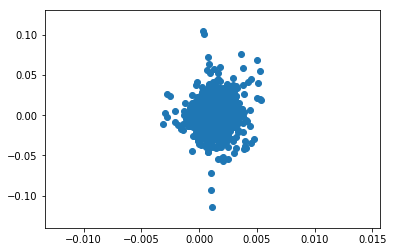

In [126]:
plt.scatter(data_0['arma11garch11'], data_0['adj_log_return'] )

In [127]:
np.corrcoef(data_0['Adj Close'], data_0['adj_log_return'])

array([[1.        , 0.03937746],
       [0.03937746, 1.        ]])

In [128]:
df = data_0.copy()

## Technical indicators

In [192]:
msft = pd.read_csv(filepath_or_buffer="/Users/g01289358/Downloads/technical_indicators.csv", parse_dates=True)
msft.index = pd.to_datetime(msft.Date, infer_datetime_format=True)

In [193]:
msft.drop(labels=msft.columns[:5], axis=1, inplace=True)

In [194]:
msft['Return'] = msft['Adj Close'].pct_change()

In [195]:
msft.columns

Index(['Adj Close', 'Volume', 'Returns', 'MACD_hist', 'STOCH', 'MA_9', 'MA_18',
       'STD_9', 'STD_18', 'EMA_9', 'EMA_18', 'RSI', 'UpperBand', 'MiddleBand',
       'LowerBand', 'ATR', 'MFI', 'Support', 'Resistance', 'Chaikin_OSC',
       'Return'],
      dtype='object')

In [196]:
msft.drop(labels=['Returns','Adj Close'] , axis=1, inplace=True)

In [201]:
msft.dropna(inplace=True)

In [202]:
msft.corr()

,Volume,MACD_hist,STOCH,MA_9,MA_18,STD_9,STD_18,EMA_9,EMA_18,RSI,UpperBand,MiddleBand,LowerBand,ATR,MFI,Support,Resistance,Chaikin_OSC,Return
Volume,1.000000,-0.041521,-0.082410,-0.349267,-0.348262,-0.127606,-0.169112,-0.349424,-0.348504,-0.121877,-0.345353,-0.349886,-0.354473,0.050293,-0.060611,-0.350866,-0.341616,-0.395866,-0.006969
MACD_hist,-0.041521,1.000000,0.054954,0.018759,0.006390,0.039680,0.077571,0.021963,0.013865,0.393018,0.027978,0.029405,0.030877,-0.033809,0.434163,0.017675,0.018449,0.017660,0.116270
STOCH,-0.082410,0.054954,1.000000,0.496085,0.496486,0.543412,0.506917,0.496497,0.496824,0.056042,0.499858,0.496557,0.492951,-0.161853,0.011665,0.492987,0.502763,0.704704,0.010161
MA_9,-0.349267,0.018759,0.496085,1.000000,0.999821,0.752953,0.776116,0.999978,0.999902,0.106071,0.999780,0.999915,0.999699,0.108129,0.021614,0.998081,0.998521,0.608916,-0.009960
MA_18,-0.348262,0.006390,0.496486,0.999821,1.000000,0.754679,0.775730,0.999826,0.999964,0.096467,0.999562,0.999622,0.999329,0.109954,0.011698,0.998424,0.998822,0.609121,-0.010377
STD_9,-0.127606,0.039680,0.543412,0.752953,0.754679,1.000000,0.872394,0.753483,0.754816,0.005805,0.761938,0.753055,0.743557,0.296629,-0.000071,0.749004,0.769360,0.485753,-0.010896
STD_18,-0.169112,0.077571,0.506917,0.776116,0.775730,0.872394,1.000000,0.776118,0.776423,0.034798,0.781796,0.776188,0.770086,0.337082,0.028789,0.766017,0.792429,0.491819,-0.014078
EMA_9,-0.349424,0.021963,0.496497,0.999978,0.999826,0.753483,0.776118,1.000000,0.999918,0.107146,0.999823,0.999954,0.999734,0.108048,0.022049,0.998137,0.998577,0.609002,-0.009092
EMA_18,-0.348504,0.013865,0.496824,0.999902,0.999964,0.754816,0.776423,0.999918,1.000000,0.098785,0.999698,0.999771,0.999490,0.109727,0.015157,0.998515,0.998903,0.609215,-0.009873
RSI,-0.121877,0.393018,0.056042,0.106071,0.096467,0.005805,0.034798,0.107146,0.098785,1.000000,0.109173,0.111722,0.114330,-0.163279,0.744473,0.083210,0.082315,0.074534,0.290073


In [553]:
mu, std = np.round(msft.Return.mean(),3), np.round(msft.Return.std(),3)
sell_thresh = np.round(mu - 1*std,3)
buy_thresh = np.round(mu + 1*std,3)

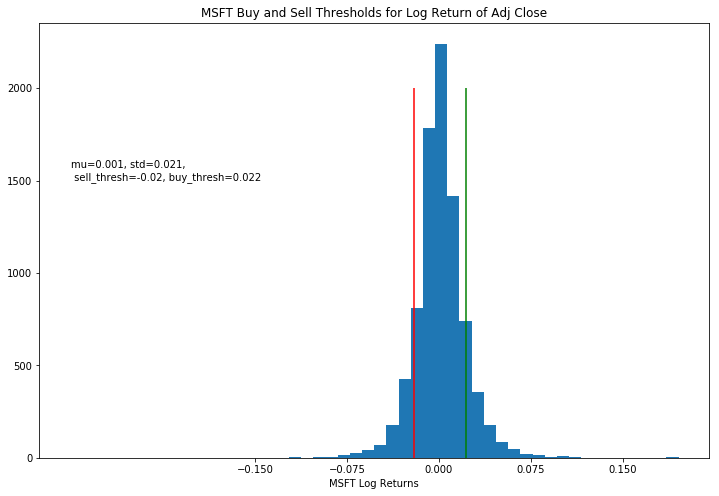

In [554]:
plt.figure(figsize=(12,8))
plt.hist(bins=50, x=msft['Return'])
plt.xticks(np.linspace(-0.15, 0.15, 5))
plt.vlines(x=[buy_thresh, sell_thresh], ymax=2000, ymin=0, colors=['green', 'red'])
plt.text(s = "mu={}, std={},\n sell_thresh={}, buy_thresh={}".format(mu,std, sell_thresh,buy_thresh), y=1500, x=-0.3)
plt.xlabel('MSFT Log Returns')
plt.title('MSFT Buy and Sell Thresholds for Log Return of Adj Close')
plt.show()

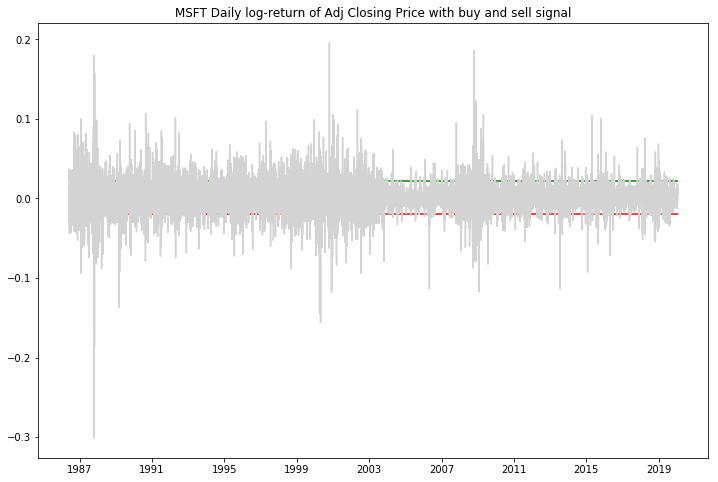

In [955]:
plt.figure(figsize=(12,8))
plt.plot(msft.Return, c='lightgrey')
plt.hlines(y=[buy_thresh, sell_thresh], xmin=msft.index[0], xmax=msft.index[-1], colors=['green', 'red'])
plt.title("MSFT Daily log-return of Adj Closing Price with buy and sell signal")
#plt.text(x=2009, y=-0.2, s="#doNothing={} #buy={}  #sell={}".format(signal_counts[0], signal_counts[1],signal_counts[0]))
plt.show()

In [423]:
def f(row):
    if row['Return'] > buy_thresh:
        return 1
    elif row['Return'] < sell_thresh:
        return -1
    else:
        return 0

In [556]:
msft['signal'] = msft.apply(f, axis=1)

In [956]:
msft.signal.value_counts()

 0    6552
 1     997
-1     933
Name: signal, dtype: int64

In [942]:
signal_counts=list(msft.signal.value_counts())

In [943]:
signal_counts

[6552, 997, 933]

In [272]:
msft.columns

Index(['Volume', 'MACD_hist', 'STOCH', 'MA_9', 'MA_18', 'STD_9', 'STD_18',
       'EMA_9', 'EMA_18', 'RSI', 'UpperBand', 'MiddleBand', 'LowerBand', 'ATR',
       'MFI', 'Support', 'Resistance', 'Chaikin_OSC', 'Return', 'signal'],
      dtype='object')

In [562]:
training_data = msft[:'2017-12-31'].drop('Return',axis=1)
test_data = msft['2017-12-31':].drop('Return',axis=1)

## Scaling the features

In [439]:
from sklearn.preprocessing import StandardScaler

In [532]:
scaler = StandardScaler()
scaler.fit(training_data.drop(['signal'],axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [533]:
training_df = scaler.transform(training_data.drop(['signal'],axis=1))

In [535]:
test_df = scaler.transform(test_data.drop(['signal'], axis=1))

## Adding lag values

In [622]:
msft['lagreturn1'] = msft.Return.shift(1)
msft['lagreturn2'] = msft.Return.shift(2)


In [623]:
msft.columns

Index(['Volume', 'MACD_hist', 'STOCH', 'MA_9', 'MA_18', 'STD_9', 'STD_18',
       'EMA_9', 'EMA_18', 'RSI', 'UpperBand', 'MiddleBand', 'LowerBand', 'ATR',
       'MFI', 'Support', 'Resistance', 'Chaikin_OSC', 'Return', 'signal',
       'lagreturn1', 'lagreturn2'],
      dtype='object')

In [638]:
from sklearn.feature_selection import mutual_info_classif

In [642]:
msft.dropna(inplace=True)

In [644]:
msft.columns

Index(['Volume', 'MACD_hist', 'STOCH', 'MA_9', 'MA_18', 'STD_9', 'STD_18',
       'EMA_9', 'EMA_18', 'RSI', 'UpperBand', 'MiddleBand', 'LowerBand', 'ATR',
       'MFI', 'Support', 'Resistance', 'Chaikin_OSC', 'Return', 'signal',
       'lagreturn1', 'lagreturn2'],
      dtype='object')

In [676]:
mut_info =pd.DataFrame(mutual_info_classif(msft.drop(['signal','Return'], axis=1), msft.signal),
          index=msft.drop(['signal','Return'],axis=1).columns)



In [680]:
mut_info.columns = ['MI']

In [701]:
pd.Series(mut_info.to_dict()['MI']).sort_values(ascending=False)

Volume         0.092397
Resistance     0.069704
Support        0.057400
MA_18          0.036623
ATR            0.035702
EMA_18         0.034085
RSI            0.033433
MiddleBand     0.032146
Chaikin_OSC    0.031528
UpperBand      0.031415
LowerBand      0.030867
EMA_9          0.030394
MA_9           0.027664
STOCH          0.023655
lagreturn1     0.017467
lagreturn2     0.014418
STD_18         0.014185
STD_9          0.013745
MACD_hist      0.012784
MFI            0.005832
dtype: float64

In [624]:
training_data_2 = msft.drop(['Return'],axis=1)[:'2017-12-31']
test_data_2 = msft.drop(['Return'],axis=1)['2017-12-31':]

In [625]:
training_data_2.dropna(inplace=True)

In [626]:
scaler_2 = StandardScaler()
training_data_2_scaled = scaler_2.fit_transform(training_data_2.drop('signal', axis=1))

In [627]:
test_data_2_scaled = scaler_2.transform(test_data_2.drop('signal',axis=1))

In [628]:
rf_2 = RandomForestClassifier(n_estimators=30, 
                            class_weight=training_data_2.signal.value_counts().to_dict()).fit(training_data_2_scaled, 
                                                                                   training_data_2.signal)

In [629]:
rf_2_pred = rf_2.predict(test_data_2_scaled)


In [599]:
test_data_2.signal.value_counts()

 0    445
-1     40
 1     30
Name: signal, dtype: int64

In [630]:
pd.Series(rf_2_pred).value_counts()

 0    477
 1     21
-1     17
dtype: int64

In [631]:
print(classification_report(test_data_2.signal, rf_2_pred))

              precision    recall  f1-score   support

          -1       0.59      0.25      0.35        40
           0       0.90      0.97      0.93       445
           1       0.29      0.20      0.24        30

    accuracy                           0.87       515
   macro avg       0.59      0.47      0.51       515
weighted avg       0.84      0.87      0.85       515



In [572]:
print(classification_report(test_data_2.signal, rf_2_pred))

              precision    recall  f1-score   support

          -1       0.49      0.42      0.45        40
           0       0.91      0.96      0.93       445
           1       0.27      0.13      0.18        30

    accuracy                           0.87       515
   macro avg       0.56      0.50      0.52       515
weighted avg       0.84      0.87      0.85       515



## Feature Selection

Text(0,0.5,'abs. value of corr_coeff')

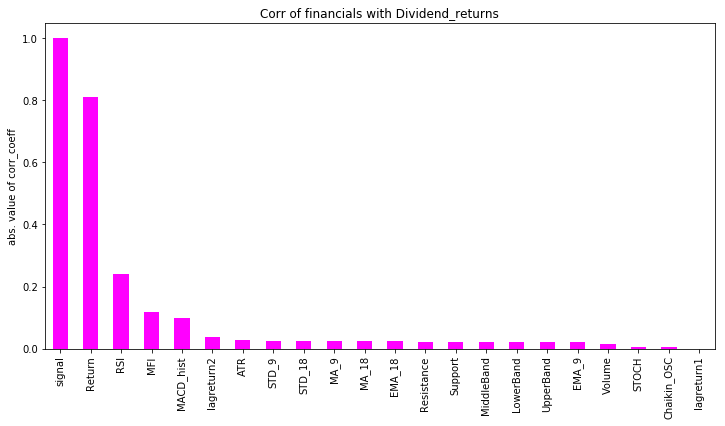

In [750]:
corr_table=pd.DataFrame(round(msft.corr()['signal'],3), columns=['signal'] )
corr_table['abs'] = abs(corr_table['signal'])
corr_table.sort_values('abs', ascending=False, inplace=True)
plt.figure(figsize=(12,6))
corr_table['abs'].plot(kind='bar', color='magenta')
plt.title('Corr of financials with Dividend_returns')
plt.ylabel("abs. value of corr_coeff")

In [703]:
mut_info =pd.DataFrame(mutual_info_classif(msft.drop(['signal','Return'], axis=1), msft.signal),
          index=msft.drop(['signal','Return'],axis=1).columns)
mut_info.columns = ['MI']
pd.Series(mut_info.to_dict()['MI']).sort_values(ascending=False)

Volume         0.092388
Resistance     0.072970
Support        0.057707
MA_18          0.036582
ATR            0.035702
EMA_18         0.034085
RSI            0.033756
MiddleBand     0.032163
Chaikin_OSC    0.031528
UpperBand      0.031379
LowerBand      0.030905
EMA_9          0.030394
MA_9           0.027539
STOCH          0.023655
lagreturn1     0.016076
lagreturn2     0.014522
STD_18         0.014142
STD_9          0.013548
MACD_hist      0.012784
MFI            0.005832
dtype: float64

## Selecting features 'RSI' , 'MFI', 'MACD_hist' , 'lagreturn2', 'Volume', 'Resistance', 'Support'

In [704]:
msft.columns

Index(['Volume', 'MACD_hist', 'STOCH', 'MA_9', 'MA_18', 'STD_9', 'STD_18',
       'EMA_9', 'EMA_18', 'RSI', 'UpperBand', 'MiddleBand', 'LowerBand', 'ATR',
       'MFI', 'Support', 'Resistance', 'Chaikin_OSC', 'Return', 'signal',
       'lagreturn1', 'lagreturn2'],
      dtype='object')

In [709]:
df= msft[['RSI' , 'MFI', 'MACD_hist' , 'lagreturn2', 'Volume', 'Resistance', 'Support', 'signal']]

In [710]:
training_df = df[:'2017-12-31']
test_df = df['2017-12-31':]

In [712]:
X_train = training_df.drop('signal',axis=1)
y_train = training_df.signal
X_test = test_df.drop('signal',axis=1)
y_test = test_df.signal

In [713]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [714]:
pd.Series(y_train).value_counts()

 0    6107
 1     967
-1     893
Name: signal, dtype: int64

In [715]:
pd.Series(y_test).value_counts()

 0    445
-1     40
 1     30
Name: signal, dtype: int64

In [729]:
rf_ = RandomForestClassifier(n_estimators=30, 
                            class_weight=y_train.value_counts().to_dict()).fit(X_train_scaled, y_train)

In [730]:
rf_pred = rf_.predict(X_test_scaled)

In [731]:
pd.Series(rf_pred).value_counts()

 0    471
-1     34
 1     10
dtype: int64

In [732]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

          -1       0.53      0.45      0.49        40
           0       0.91      0.96      0.94       445
           1       0.40      0.13      0.20        30

    accuracy                           0.88       515
   macro avg       0.61      0.52      0.54       515
weighted avg       0.85      0.88      0.86       515



In [733]:
msft.head()

,Volume,MACD_hist,STOCH,MA_9,MA_18,STD_9,STD_18,EMA_9,EMA_18,RSI,...,LowerBand,ATR,MFI,Support,Resistance,Chaikin_OSC,Return,signal,lagreturn1,lagreturn2
Date,,,,,,,,,,,,,,,,,,,,,
1986-05-27,13881600,-0.000461,-689.094566,0.070615,0.070864,0.001121,0.000875,0.070479,0.070322,57.418424,...,0.068133,0.040229,36.887638,0.058081,0.075952,-1.988498e+09,0.032258,1,0.000000,0.000000
1986-05-28,15523200,-0.000214,-764.753051,0.070864,0.071019,0.001515,0.001105,0.071127,0.070680,62.643051,...,0.067016,0.040434,43.997823,0.058081,0.075952,-1.852737e+09,0.031250,1,0.032258,0.000000
1986-05-29,45676800,0.000048,-745.352433,0.071298,0.071267,0.002145,0.001510,0.071980,0.071176,65.959709,...,0.066946,0.040775,55.760646,0.058081,0.075952,-1.857170e+09,0.022727,1,0.031250,0.032258
1986-05-30,27072000,0.000376,-576.927884,0.071981,0.071701,0.003152,0.002202,0.073222,0.071914,70.570628,...,0.067432,0.041282,60.171721,0.058081,0.078186,-1.830641e+09,0.037037,1,0.022727,0.031250
1986-06-02,19728000,0.000407,-383.911445,0.072539,0.071981,0.003379,0.002407,0.073768,0.072339,63.306928,...,0.070457,0.041429,53.262278,0.058081,0.078186,-1.811874e+09,-0.028571,-1,0.037037,0.022727


## ARMAGARCH added as a feature

In [747]:
msft_= pd.concat(objs=[msft, arma11garch11], axis=1, join='inner')

In [748]:
mut_info =pd.DataFrame(mutual_info_classif(msft_.drop(['signal','Return'], axis=1), msft_.signal),
          index=msft_.drop(['signal','Return'],axis=1).columns)
mut_info.columns = ['MI']
pd.Series(mut_info.to_dict()['MI']).sort_values(ascending=False)

Volume           0.092580
Resistance       0.072986
Support          0.055283
MA_18            0.036704
ATR              0.035702
EMA_18           0.034085
RSI              0.033412
MiddleBand       0.032065
UpperBand        0.031673
Chaikin_OSC      0.031528
LowerBand        0.030919
EMA_9            0.030394
MA_9             0.027879
STOCH            0.023655
arma11garch11    0.020880
lagreturn1       0.016024
lagreturn2       0.014193
STD_18           0.014045
STD_9            0.013839
MACD_hist        0.012784
MFI              0.005832
dtype: float64

Text(0,0.5,'abs. value of corr_coeff')

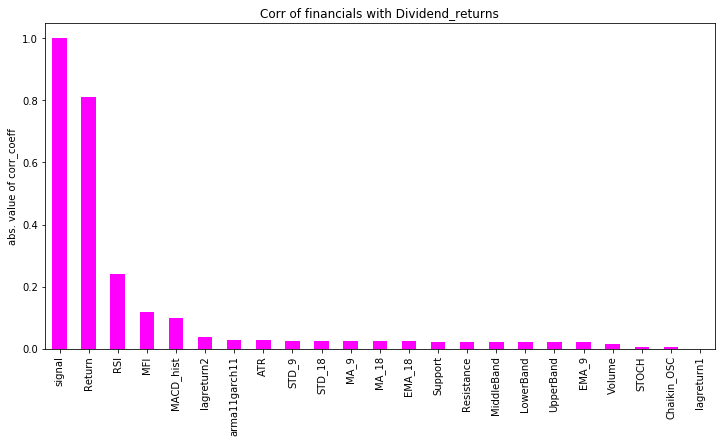

In [752]:
corr_table=pd.DataFrame(round(msft_.corr()['signal'],3), columns=['signal'] )
corr_table['abs'] = abs(corr_table['signal'])
corr_table.sort_values('abs', ascending=False, inplace=True)
plt.figure(figsize=(12,6))
corr_table['abs'].plot(kind='bar', color='magenta')
plt.title('Corr of financials with Dividend_returns')
plt.ylabel("abs. value of corr_coeff")

In [779]:
df_= msft_[['RSI' , 'MFI', 'MACD_hist' , 'lagreturn2', 'Volume', 'Resistance', 'Support', 'signal', 'arma11garch11']]

In [780]:
training_df = df[:'2017-12-31']
test_df = df['2017-12-31':]

In [781]:
X_train = training_df.drop('signal',axis=1)
y_train = training_df.signal
X_test = test_df.drop('signal',axis=1)
y_test = test_df.signal

In [782]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [825]:
rf_ = RandomForestClassifier(n_estimators=30, 
                            class_weight=
                            y_train.value_counts().to_dict()).fit(X_train_scaled, y_train)


In [826]:
rf_pred = rf_.predict(X_test_scaled)

In [827]:
pd.Series(rf_pred).value_counts()

 0    471
-1     36
 1      8
dtype: int64

In [828]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

          -1       0.44      0.40      0.42        40
           0       0.90      0.95      0.93       445
           1       0.25      0.07      0.11        30

    accuracy                           0.86       515
   macro avg       0.53      0.47      0.48       515
weighted avg       0.83      0.86      0.84       515



In [829]:
from sklearn.mixture import BayesianGaussianMixture

In [859]:
mixture = BayesianGaussianMixture(n_components=5)

In [904]:
df_pos =msft[['RSI' , 'MFI', 'MACD_hist' , 'lagreturn2', 'Volume', 'Resistance', 'Support', 'signal']]

In [905]:
df_pos.dropna(inplace=True)

/Users/g01289358/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [885]:
samples[0].shape

(100, 22)

In [888]:
df_pos = msft.append(pos_samples,ignore_index=True)

In [889]:
df_pos.signal.value_counts()

 0    6552
 1    1097
-1     933
Name: signal, dtype: int64

In [906]:
training_df = df_pos[:'2017-12-31']
test_df = df['2017-12-31':]

In [907]:
mixture.fit(training_df[training_df['signal'] == 1])

BayesianGaussianMixture(covariance_prior=None, covariance_type='full',
                        degrees_of_freedom_prior=None, init_params='kmeans',
                        max_iter=100, mean_precision_prior=None,
                        mean_prior=None, n_components=5, n_init=1,
                        random_state=None, reg_covar=1e-06, tol=0.001,
                        verbose=0, verbose_interval=10, warm_start=False,
                        weight_concentration_prior=None,
                        weight_concentration_prior_type='dirichlet_process')

In [908]:
samples = mixture.sample(n_samples=100)

/Users/g01289358/anaconda3/lib/python3.6/site-packages/sklearn/mixture/base.py:427: RuntimeWarning: covariance is not positive-semidefinite.
  for (mean, covariance, sample) in zip(


In [910]:
pos_samples = pd.DataFrame(samples[0], columns=list(df_pos.columns))
pos_samples.signal = pos_samples.signal.map(lambda x: 1)
training_df = training_df.append(pos_samples,ignore_index=True)
training_df.signal.value_counts()

 0    6107
 1    1067
-1     893
Name: signal, dtype: int64

In [911]:
X_train = training_df.drop('signal',axis=1)
y_train = training_df.signal
X_test = test_df.drop('signal',axis=1)
y_test = test_df.signal

In [912]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [913]:
X_test_scaled

array([[ 0.62139086,  0.17707474, -0.67362147, ..., -1.07248048,
         3.90458012,  4.04030855],
       [ 0.77877948,  0.19815012, -0.4697399 , ..., -0.97750191,
         3.90458012,  4.04030855],
       [ 1.0589961 ,  0.64868054, -0.01072781, ..., -1.08766069,
         3.91963825,  4.04030855],
       ...,
       [ 1.39016835,  0.32171724,  0.94459972, ..., -1.10077812,
         8.63728495,  8.62438102],
       [ 1.79478909,  0.40910992,  2.25940347, ..., -1.03580159,
         8.81008598,  8.62438102],
       [ 1.90543358,  0.54447335,  3.2317817 , ..., -0.75687903,
         8.86569371,  8.62438102]])

In [914]:
pd.Series(y_test).value_counts()

 0    445
-1     40
 1     30
Name: signal, dtype: int64

In [915]:
rf_ = RandomForestClassifier(n_estimators=30, 
                            class_weight=y_train.value_counts().to_dict()).fit(X_train_scaled, y_train)

In [916]:
rf_pred = rf_.predict(X_test_scaled)

In [917]:
pd.Series(rf_pred).value_counts()

 0    476
-1     33
 1      6
dtype: int64

In [918]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

          -1       0.42      0.35      0.38        40
           0       0.90      0.96      0.93       445
           1       0.00      0.00      0.00        30

    accuracy                           0.86       515
   macro avg       0.44      0.44      0.44       515
weighted avg       0.81      0.86      0.83       515

